In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [55]:
airbnb= pd.read_csv(r"C:\Users\PRAKASH CHANDRA\Desktop\Projects\Airbnb\AB_NYC_2019.csv")
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [56]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [57]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [58]:
airbnb.drop(['last_review'],axis=1,inplace=True)

In [59]:
airbnb['name'].fillna("@", inplace=True)
airbnb['host_name'].fillna("$",inplace=True)
airbnb['reviews_per_month'].fillna(0,inplace=True)

In [60]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [61]:
airbnb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [62]:
airbnb.groupby(["neighbourhood_group"]).size().reset_index(name='count')

,neighbourhood_group,count
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


Text(0, 0.5, 'Count')

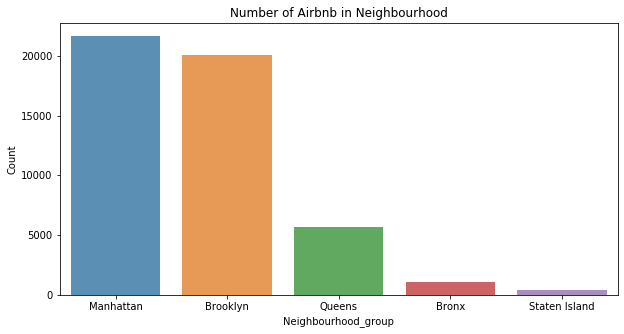

In [63]:
neighbourhood_count= airbnb['neighbourhood_group'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(neighbourhood_count.index, neighbourhood_count.values, alpha=0.8)
plt.title("Number of Airbnb in Neighbourhood")
plt.xlabel("Neighbourhood_group")
plt.ylabel("Count")

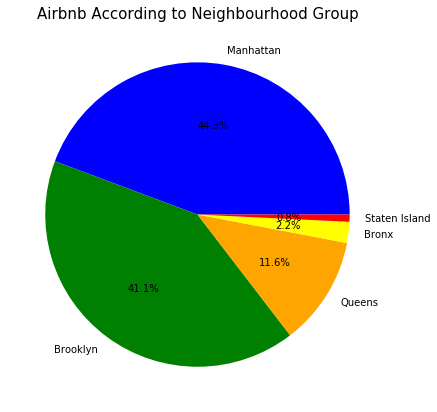

In [76]:
labels = airbnb.neighbourhood_group.value_counts().index
colors = ['blue','green','orange','yellow','red']
explode = [0,0,0,0,0]
sizes = airbnb.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'black',fontsize = 15)
plt.show()


In [33]:
airbnb.groupby(["room_type"]).size().reset_index(name='count')

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


<function matplotlib.pyplot.show(*args, **kw)>

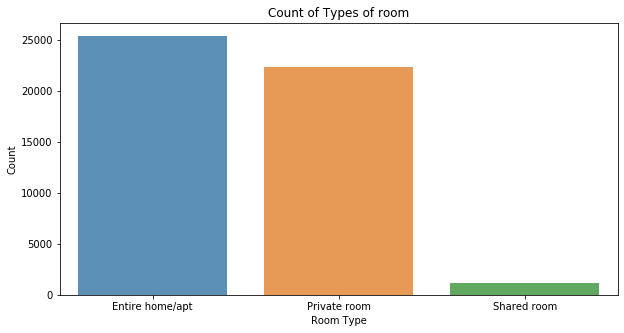

In [39]:
type_of_room= airbnb['room_type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(type_of_room.index, type_of_room.values, alpha= 0.8)
plt.title("Count of Types of room")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show

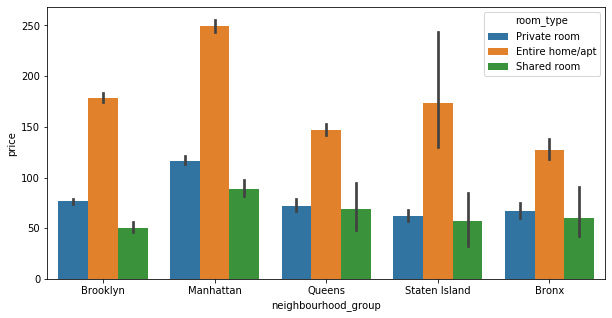

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = airbnb)
plt.show()

In [94]:
airbnb.calculated_host_listings_count.unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32], dtype=int64)

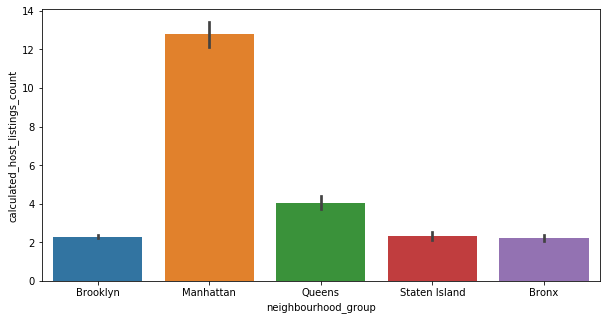

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x = "neighbourhood_group", y = "calculated_host_listings_count" , data = airbnb)
plt.show()

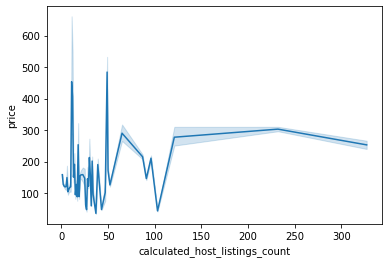

In [98]:
sns.lineplot(x='calculated_host_listings_count',y='price',data=airbnb)
plt.show()

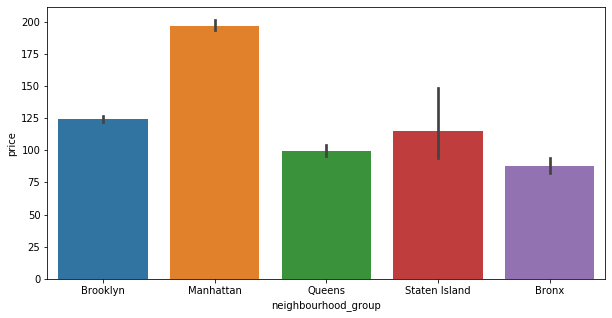

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x = "neighbourhood_group", y = "price", data = airbnb)
plt.show()

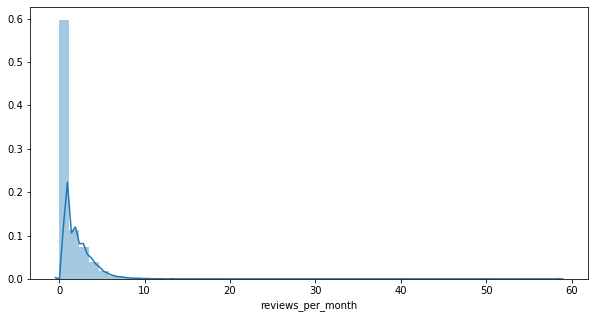

In [81]:
f,ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(airbnb.reviews_per_month)
plt.show()

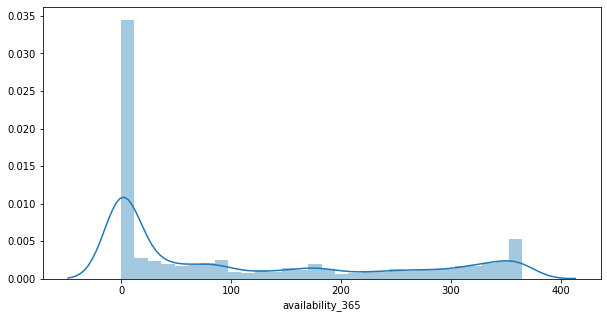

In [82]:
f,ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(airbnb.availability_365)
plt.show()

Text(0, 0.5, 'Host_Id')

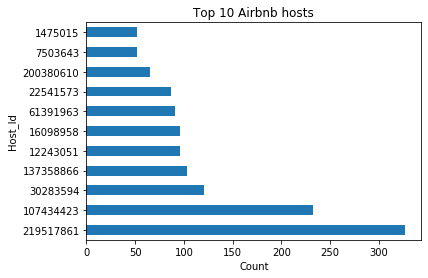

In [119]:
top_hosts = airbnb['host_id'].value_counts()
top_hosts[:11].plot(kind='barh')
plt.title("Top 10 Airbnb hosts")
plt.xlabel("Count")
plt.ylabel("Host_Id")

